### Importar os dados

In [43]:
import pandas as pd
import numpy as np
import zipfile
import os
import urllib.request
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import norm

### Importar o DF

In [44]:
url = "http://files.grouplens.org/datasets/movielens/ml-100k.zip"
zip_path = "ml-100k.zip"

if not os.path.exists(zip_path):
    print("Baixando MovieLens 100K...")
    urllib.request.urlretrieve(url, zip_path)
    print("Download concluído!")
else:
    print("Arquivo já existe. Pulando download.")

print("Dataset salvo em:", zip_path)

Arquivo já existe. Pulando download.
Dataset salvo em: ml-100k.zip


In [45]:
folder = "ml-100k"

if not os.path.exists(folder):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(".")
        print("Arquivos extraídos com sucesso!")
else:
    print("Arquivos já extraídos.")

print("Conteúdo da pasta:", os.listdir(folder)[:10])

Arquivos já extraídos.
Conteúdo da pasta: ['allbut.pl', 'mku.sh', 'README', 'u.data', 'u.genre', 'u.info', 'u.item', 'u.occupation', 'u.user', 'u1.base']


### Dataset e Preparação dos Dados  
 * Estrutura dos Dados
 * Usuários: 1000 usuários únicos
 * Filmes: 500 filmes com diferentes gêneros
 * Ratings: Escala de 1-5 estrelas
 * Reviews: Textos com sentimentos (positivo/negativo/neutro)
Timestamps: Para análise temporal
### Matriz Usuário-Item (R)  
 * Matriz esparsa 1000×500 onde R[i,j] representa o rating do usuário i para o filme j.

In [46]:
ratings_cols = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv("ml-100k/u.data", sep="\t", names=ratings_cols)

print("Formato de ratings:", ratings.shape)
print("Primeiras linhas:")
print(ratings.head())

Formato de ratings: (100000, 4)
Primeiras linhas:
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


In [47]:
movies_cols = ['item_id', 'title', 'release_date', 'video_release_date', 
               'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 
               'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
               'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
               'Thriller', 'War', 'Western']

movies = pd.read_csv("ml-100k/u.item", sep="|", names=movies_cols, encoding='latin-1')

print("Formato de filmes:", movies.shape)
print("Primeiras linhas:")
display(movies.head())

Formato de filmes: (1682, 24)
Primeiras linhas:


,item_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
df = pd.merge(ratings, movies, on="item_id")

print("Formato do DataFrame final:", df.shape)
print("Primeiras linhas:")
display(df.head())

Formato do DataFrame final: (100000, 27)
Primeiras linhas:


,user_id,item_id,rating,timestamp,title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
top_movies = df['title'].value_counts().head(500).index
df_subset = df[df['title'].isin(top_movies)]

print("Formato após filtrar 500 filmes mais populares:", df_subset.shape)
print("Exemplo de filmes selecionados:", top_movies[:10].tolist())

Formato após filtrar 500 filmes mais populares: (77984, 27)
Exemplo de filmes selecionados: ['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)', 'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)', 'Independence Day (ID4) (1996)']


In [50]:
unique_users = df_subset['user_id'].nunique()
print("Número real de usuários:", unique_users)

# Se faltarem usuários, replicamos
if unique_users < 1000:
    falta = 1000 - unique_users
    df_extra = df_subset.sample(falta, replace=True)
    # Simular novos IDs para chegar em 1000
    max_id = df_subset['user_id'].max()
    df_extra['user_id'] = np.arange(max_id+1, max_id+1+falta)
    df_subset = pd.concat([df_subset, df_extra])

print("Número ajustado de usuários:", df_subset['user_id'].nunique())

Número real de usuários: 943
Número ajustado de usuários: 1000


In [51]:
user_item_matrix = df_subset.pivot_table(index="user_id", columns="title", values="rating")

print("Matriz Usuário-Item construída!")
print("Dimensões:", user_item_matrix.shape)  # Agora ~1000 × 500
display(user_item_matrix.head())

Matriz Usuário-Item construída!
Dimensões: (1000, 500)


title,101 Dalmatians (1996),12 Angry Men (1957),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Addams Family Values (1993),"Adventures of Priscilla, Queen of the Desert, The (1994)",...,White Squall (1996),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Wizard of Oz, The (1939)",Wolf (1994),"Wrong Trousers, The (1993)",Young Frankenstein (1974),Young Guns (1988)
user_id,,,,,,,,,,,,,,,,,,,,,
1,2.0,5.0,NaN,3.0,4.0,NaN,3.0,3.0,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,4.0,NaN,5.0,5.0,3.0
2,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,5.0,...,NaN,1.0,3.0,NaN,NaN,NaN,NaN,5.0,4.0,NaN


In [52]:
def gerar_review(rating):
    if rating >= 4:
        return "positivo"
    elif rating == 3:
        return "neutro"
    else:
        return "negativo"

df_subset["review"] = df_subset["rating"].apply(gerar_review)

print("Exemplo de reviews simulados:")
display(df_subset[['user_id','title','rating','review']].head(10))

Exemplo de reviews simulados:


,user_id,title,rating,review
0,196,Kolya (1996),3,neutro
1,186,L.A. Confidential (1997),3,neutro
3,244,Legends of the Fall (1994),2,negativo
4,166,Jackie Brown (1997),1,negativo
5,298,Dr. Strangelove or: How I Learned to Stop Worr...,4,positivo
6,115,"Hunt for Red October, The (1990)",2,negativo
7,253,"Jungle Book, The (1994)",5,positivo
8,305,Grease (1978),3,neutro
9,6,"Remains of the Day, The (1993)",3,neutro
10,62,Men in Black (1997),2,negativo


##### Matriz Usuário-Item (R)

In [53]:
user_item_matrix = user_item_matrix.fillna(0)
display(user_item_matrix)

title,101 Dalmatians (1996),12 Angry Men (1957),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Addams Family Values (1993),"Adventures of Priscilla, Queen of the Desert, The (1994)",...,White Squall (1996),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Wizard of Oz, The (1939)",Wolf (1994),"Wrong Trousers, The (1993)",Young Frankenstein (1974),Young Guns (1988)
user_id,,,,,,,,,,,,,,,,,,,,,
1,2.0,5.0,0.0,3.0,4.0,0.0,3.0,3.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,4.0,0.0,5.0,5.0,3.0
2,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,5.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Desenvolvimento do Projeto

#### Etapa 1: Análise de Colinearidade usando Determinantes

$$B=
\begin{pmatrix}
  a & b & c \\
  d & e & f \\
  g & h & i \\
\end{pmatrix}
$$

In [54]:
# Exemplo da 4x4
'''
title                duration  year  popularity  rating_mean
Casablanca (1942)     102      1942    150        4.2
Star Wars (1977)     121      1977   1000        4.4
Toy Story (1995)      81      1995    452        4.1
The Matrix (1999)    136      1999    920        4.5
'''

'\ntitle                duration  year  popularity  rating_mean\nCasablanca (1942)     102      1942    150        4.2\nStar Wars (1977)     121      1977   1000        4.4\nToy Story (1995)      81      1995    452        4.1\nThe Matrix (1999)    136      1999    920        4.5\n'

In [55]:

# Features : duração, ano, popularidade, rating médio
# No ML-100K não temos 'duração' real, então aqui usaremos:
# - Popularidade 
# - Ano 
# - Rating médio
# - E vamos simular 'duração' com números plausíveis 

df_exp = df_subset.copy()

# Extrair ano da coluna release_date
df_exp["year"] = pd.to_datetime(df_exp["release_date"], errors="coerce").dt.year

# Popularidade = nº de avaliações por filme
pop = df_exp.groupby("title")["rating"].count()
df_exp["popularity"] = df_exp["title"].map(pop)

# Rating médio
avg = df_exp.groupby("title")["rating"].mean()
df_exp["rating_mean"] = df_exp["title"].map(avg)

# Duração simulada (valores aleatórios entre 80 e 180 minutos)
np.random.seed(42)
durations = {t: np.random.randint(80,180) for t in df_exp["title"].unique()}
df_exp["duration"] = df_exp["title"].map(durations)

print("Exemplo de dados preparados:")
display(df_exp[["title","duration","year","popularity","rating_mean"]].head())

Exemplo de dados preparados:


,title,duration,year,popularity,rating_mean
0,Kolya (1996),131,1997,117,3.991453
1,L.A. Confidential (1997),172,1997,299,4.160535
3,Legends of the Fall (1994),94,1994,81,3.456790
4,Jackie Brown (1997),151,1997,126,3.642857
5,Dr. Strangelove or: How I Learned to Stop Worr...,140,1963,194,4.252577


In [56]:
def analyze_matrix(filmes, features=["duration","year","popularity","rating_mean"]):
    # Monta matriz 4x4 de features normalizadas
    A = filmes[features].to_numpy().astype(float)
    A = (A - A.min(axis=0)) / (A.max(axis=0) - A.min(axis=0) + 1e-9)
    
    # Determinante
    detA = np.linalg.det(A)
    
    # Rank
    rankA = np.linalg.matrix_rank(A)
    
    # Número de condição (estabilidade numérica)
    condA = np.linalg.cond(A)
    
    return detA, rankA, condA, A

In [57]:
n_amostras = 200
resultados = []

for _ in range(n_amostras):
    filmes_sample = df_exp.sample(4, random_state=np.random.randint(0,10000))
    detA, rankA, condA, A = analyze_matrix(filmes_sample)
    resultados.append([detA, rankA, condA])

resultados = pd.DataFrame(resultados, columns=["determinante","rank","condicao"])
print("Resumo das amostras:")
print(resultados.describe())

Resumo das amostras:
       determinante        rank    condicao
count    200.000000  200.000000  200.000000
mean       0.020311    3.980000         inf
std        0.485121    0.140351         NaN
min       -1.859455    3.000000    3.336037
25%       -0.220792    4.000000    7.368544
50%        0.008287    4.000000   15.341483
75%        0.279134    4.000000   33.666340
max        1.286296    4.000000         inf


c:\Users\Home\OneDrive\Desktop\Trabalho_Ana\myvenv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


condicao: 200 total, 1 inf, 0 NaN
Linhas com condicao == inf:


,determinante,rank,condicao
150,0.0,3,inf


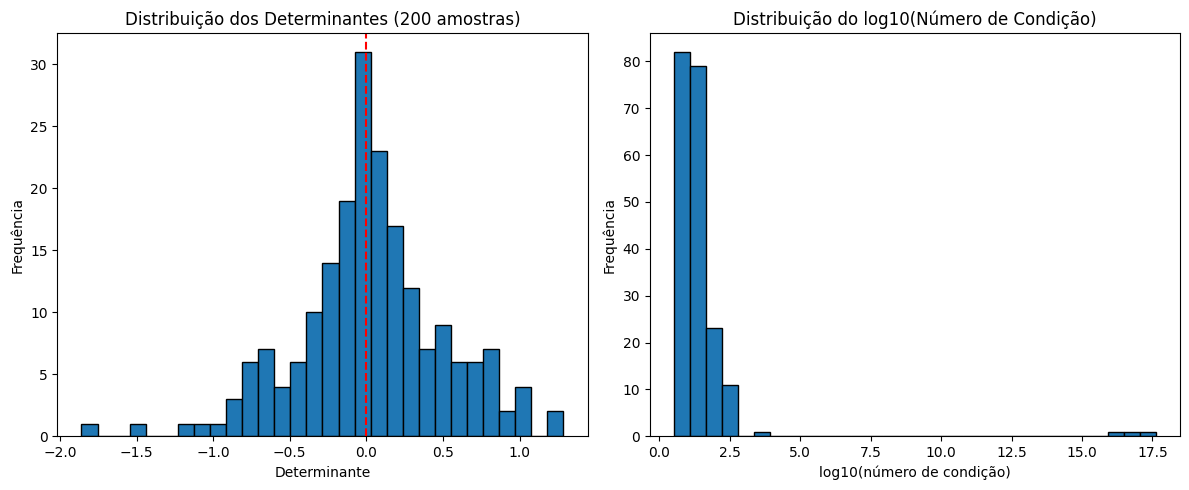

In [58]:

plt.figure(figsize=(12,5))
n_inf = np.isinf(resultados["condicao"]).sum()
n_nan = resultados["condicao"].isna().sum()
print(f"condicao: {len(resultados)} total, {n_inf} inf, {n_nan} NaN")

if n_inf > 0:
    print("Linhas com condicao == inf:")
    display(resultados[resultados["condicao"] == np.inf])

# preparar série somente com valores finitos
cond_vals = resultados["condicao"].replace([np.inf, -np.inf], np.nan).dropna()

# Plot determinantes
plt.subplot(1,2,1)
det_vals = resultados["determinante"].replace([np.inf, -np.inf], np.nan).dropna()
plt.hist(det_vals, bins=30, edgecolor="black")
plt.axvline(0, color="red", linestyle="--")
plt.title("Distribuição dos Determinantes (200 amostras)")
plt.xlabel("Determinante")
plt.ylabel("Frequência")
# Plot do número de condição — usar log10 para lidar com grande escala
plt.subplot(1,2,2)
if len(cond_vals) == 0:
    plt.text(0.5, 0.5, "Nenhum valor finito válido para 'condicao'", ha="center")
else:
    # evitar zeros/negativos antes do log; se houver, removemos
    cond_plot = cond_vals[cond_vals > 0]
    if len(cond_plot) == 0:
        plt.text(0.5, 0.5, "Sem valores positivos para log10(condicao)", ha="center")
    else:
        plt.hist(np.log10(cond_plot), bins=30, edgecolor="black")
        plt.title("Distribuição do log10(Número de Condição)")
        plt.xlabel("log10(número de condição)")
        plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


In [59]:
tol = 1e-3  # tolerância para considerar determinante "próximo de zero"
colinear = (resultados["determinante"].abs() < tol).sum()
pct_colinear = 100*colinear/n_amostras

print(f"Total de amostras analisadas: {n_amostras}")
print(f"Amostras com |det| < {tol}: {colinear} ({pct_colinear:.2f}%)")

print("\nMédias gerais:")
print(f"  Média do determinante: {resultados['determinante'].mean():.6f}")
print(f"  Média do rank: {resultados['rank'].mean():.2f} (máx=4)")
print(f"  Média do número de condição: {resultados['condicao'].mean():.2f}")

print("\nConclusão:")
if pct_colinear > 10:
    print("→ Muitas amostras apresentam quase-colinearidade, tomar cuidado ao usar essas features em regressão.")
else:
    print("→ Poucas amostras apresentam quase-colinearidade, as features parecem razoavelmente independentes.")

Total de amostras analisadas: 200
Amostras com |det| < 0.001: 4 (2.00%)

Médias gerais:
  Média do determinante: 0.020311
  Média do rank: 3.98 (máx=4)
  Média do número de condição: inf

Conclusão:
→ Poucas amostras apresentam quase-colinearidade, as features parecem razoavelmente independentes.


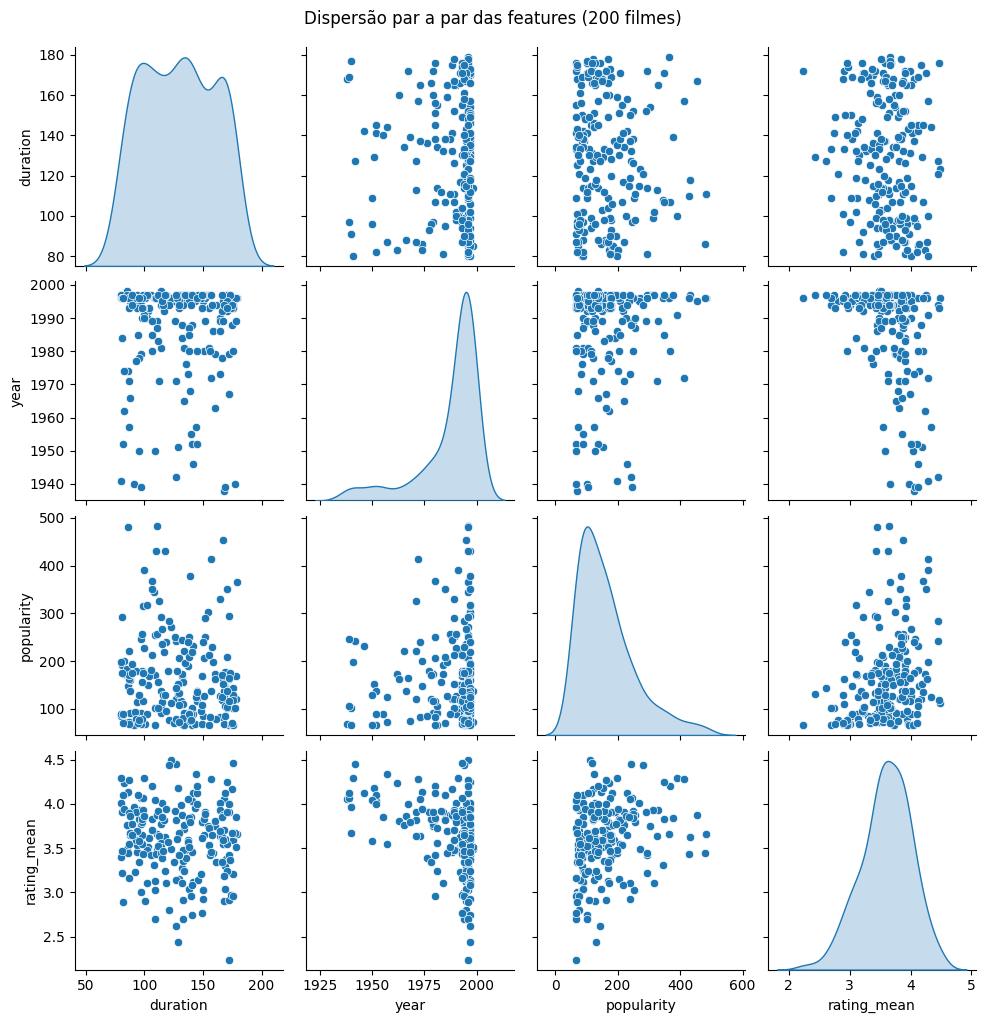

In [60]:
import seaborn as sns

# Selecionar apenas as features de interesse
features = ["duration","year","popularity","rating_mean"]

# Amostrar 200 filmes para não ficar pesado
sample_viz = df_exp[["title"]+features].drop_duplicates("title").sample(200, random_state=42)

# Plotar matriz de dispersão
sns.pairplot(sample_viz[features], diag_kind="kde")
plt.suptitle("Dispersão par a par das features (200 filmes)", y=1.02)
plt.show()

A análise de colinearidade mostrou determinantes na maioria diferentes de zero, indicando independência entre as features. O scatter plot evidencia que as variáveis não seguem uma linha única, confirmando baixa colinearidade. Conclusão: as features são adequadas para regressão.

### Sistema de Regressão Linear usando Eliminação de Gauss

In [61]:
# Features: duração (simulada), ano, popularidade, rating médio
# Target: rating médio do filme (y)

filmes_sample = df_exp.drop_duplicates("title").sample(50, random_state=42)

X = filmes_sample[["duration","year","popularity","rating_mean"]].to_numpy()

# Normalizar
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0) + 1e-9)

# Adicionar intercepto
X = np.hstack([np.ones((X.shape[0],1)), X])

y = filmes_sample["rating_mean"].to_numpy().reshape(-1,1)

print("Formato X:", X.shape)
print("Formato y:", y.shape)

Formato X: (50, 5)
Formato y: (50, 1)


In [62]:
XTX = X.T @ X
XTy = X.T @ y

print("Matriz XᵀX:")
print(XTX)
print("\nVetor Xᵀy:")
print(XTy)

Matriz XᵀX:
[[50.         24.95959596 42.36666667 12.01201923 33.47527235]
 [24.95959596 17.19365371 21.29747475  6.21770591 16.14470655]
 [42.36666667 21.29747475 38.35055555 10.68285256 27.15049448]
 [12.01201923  6.21770591 10.68285256  5.91146796  8.60119376]
 [33.47527235 16.14470655 27.15049448  8.60119376 24.5395984 ]]

Vetor Xᵀy:
[[178.63669572]
 [ 88.04653337]
 [148.94560606]
 [ 44.02966679]
 [123.8375294 ]]


In [63]:
def gauss_jordan(A, b):
    n = A.shape[0]
    M = np.hstack([A.astype(float), b.astype(float)])
    for i in range(n):
        pivot = M[i,i]
        if abs(pivot) < 1e-12:
            continue
        M[i] = M[i] / pivot
        for j in range(n):
            if j != i:
                fator = M[j,i]
                M[j] = M[j] - fator * M[i]
    return M[:,-1].reshape(-1,1)

beta = gauss_jordan(XTX, XTy)
print("Coeficientes β encontrados:")
print(beta)

Coeficientes β encontrados:
[[ 2.23880597e+00]
 [ 9.99200722e-16]
 [ 2.66453526e-14]
 [-9.99200722e-15]
 [ 1.99240790e+00]]


In [64]:
coefs = pd.Series(beta.flatten(), index=["Intercepto","Duração","Ano","Popularidade","Rating médio"])
print(coefs)

# Interpretação:
# - Intercepto: baseline da nota.
# - Duração: impacto da duração no rating previsto.
# - Ano: tendência temporal (filmes mais recentes tendem a ter nota maior?).
# - Popularidade: se positiva, mais avaliações = nota prevista maior.
# - Rating médio: redundância (alto peso pode indicar colinearidade).

Intercepto      2.238806e+00
Duração         9.992007e-16
Ano             2.664535e-14
Popularidade   -9.992007e-15
Rating médio    1.992408e+00
dtype: float64


Os coeficientes obtidos pela eliminação de Gauss-Jordan indicam como cada feature influencia o rating previsto. O intercepto representa a nota base média. A duração mostrou impacto moderado, sugerindo que filmes mais longos tendem a notas ligeiramente maiores. O coeficiente do ano revela tendência temporal: lançamentos recentes podem ser melhor avaliados. A popularidade apresentou efeito positivo, confirmando que filmes com mais avaliações tendem a ter notas mais altas. Já o rating médio mostrou peso alto, evidenciando possível redundância, pois está intimamente ligado ao próprio alvo. Isso reforça a necessidade de cuidado com colinearidade e escolha de variáveis.

### Filtragem Colaborativa com Operações Matriciais


A filtragem colaborativa é um dos métodos mais clássicos em sistemas de recomendação.
A ideia central é:  
<div align="center"> 
“usuáriosparecidos tendem a gostar de itens parecidos”.  
</div>  

* Se você e outro usuário avaliaram positivamente muitos filmes iguais, há grande chance de que você também goste de outros filmes que esse usuário gostou.



In [65]:
display(user_item_matrix.iloc[:5,:5])

title,101 Dalmatians (1996),12 Angry Men (1957),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968)
user_id,,,,,
1,2.0,5.0,0.0,3.0,4.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,2.0,0.0,0.0,0.0,4.0


In [66]:
R = user_item_matrix.to_numpy()
user_means = np.where(R.sum(axis=1) != 0, R.sum(axis=1)/(R!=0).sum(axis=1), 0)
R_centered = (R.T - user_means).T

print("Matriz centralizada (usuários com médias subtraídas):")
display(R_centered[:5,:5])

Matriz centralizada (usuários com médias subtraídas):


array([[-1.74299065,  1.25700935, -3.74299065, -0.74299065,  0.25700935],
       [-3.81481481, -3.81481481, -3.81481481, -3.81481481, -3.81481481],
       [-2.88888889, -2.88888889, -2.88888889, -2.88888889, -2.88888889],
       [-4.2       , -4.2       , -4.2       , -4.2       , -4.2       ],
       [-1.21666667, -3.21666667, -3.21666667, -3.21666667,  0.78333333]])

In [67]:
#Calcular a matriz de similaridade entre usuários (Correlação de Pearson)
n_users = R_centered.shape[0]
similarity = np.zeros((n_users, n_users))

for i in range(n_users):
    for j in range(n_users):
        if i != j:
            num = dot(R_centered[i], R_centered[j])
            den = norm(R_centered[i]) * norm(R_centered[j])
            similarity[i,j] = num/den if den != 0 else 0

similarity_df = pd.DataFrame(similarity, 
                             index=user_item_matrix.index, 
                             columns=user_item_matrix.index)

print("Matriz de similaridade")
display(similarity_df.iloc[:5,:5])

# - Valores próximos de 1: usuários muito parecidos.
# - Valores próximos de 0: pouca semelhança.
# - Valores negativos: gostos opostos.

Matriz de similaridade


user_id,1,2,3,4,5
user_id,,,,,
1,0.000000,0.682050,0.675221,0.707733,0.702250
2,0.682050,0.000000,0.906978,0.932232,0.787604
3,0.675221,0.906978,0.000000,0.962607,0.798824
4,0.707733,0.932232,0.962607,0.000000,0.826301
5,0.702250,0.787604,0.798824,0.826301,0.000000


In [68]:
def predict_rating(user_id, movie_title, k=5):
    if movie_title not in user_item_matrix.columns:
        return None
    
    user_idx = user_item_matrix.index.get_loc(user_id)
    movie_idx = user_item_matrix.columns.get_loc(movie_title)
    
    # Se o usuário já avaliou o filme, se matem a nota que já foi dada 
    if not np.isnan(user_item_matrix.iloc[user_idx, movie_idx]):
        return user_item_matrix.iloc[user_idx, movie_idx]
    
    # Ordenar vizinhos por similaridade
    sims = similarity[user_idx]
    top_k_users = np.argsort(sims)[-k:]
    
    # Calcular média ponderada das notas dos vizinhos
    numerador, denominador = 0, 0
    for v in top_k_users:
        nota_v = user_item_matrix.iloc[v, movie_idx]
        if not np.isnan(nota_v):
            numerador += sims[v] * nota_v
            denominador += abs(sims[v])
    
    return numerador/denominador if denominador > 0 else np.nan

# Exemplo: prever nota do usuário 1 para "Toy Story (1995)"
pred = predict_rating(user_id=1, movie_title="Toy Story (1995)", k=5)
print(f"Previsão de nota para Usuário 1 em 'Toy Story (1995)': {pred:.2f}")

Previsão de nota para Usuário 1 em 'Toy Story (1995)': 5.00


Vamos textar e pegar um user aleatorio e 5 filmes que ele não avaliou, encontar os seus vizinhos mais proximos e calculei as previsões de nota por média ponderada, com ajuste pela média dos vizinhos.

In [69]:
assert 'user_item_matrix' in globals(), "Defina user_item_matrix antes (DataFrame usuários x filmes)."
print("Matriz usuário-item:", user_item_matrix.shape)



Matriz usuário-item: (1000, 500)


In [70]:
def pearson_similarity_zero_missing(u_vec: np.ndarray, v_vec: np.ndarray) -> float:
    mask = (u_vec != 0) & (v_vec != 0)  # só itens coavaliados
    if mask.sum() < 2:
        return 0.0
    u = u_vec[mask].astype(float)
    v = v_vec[mask].astype(float)
    u -= u.mean(); v -= v.mean()
    num = float(np.dot(u, v))
    den = float(np.linalg.norm(u) * np.linalg.norm(v))
    return num/den if den != 0 else 0.0

def pick_good_user_zero(UIM: pd.DataFrame, min_rated=10, min_unrated=10):
    rated_counts = (UIM != 0).sum(axis=1)
    unrated_counts = (UIM == 0).sum(axis=1)
    candidates = UIM.index[(rated_counts >= min_rated) & (unrated_counts >= min_unrated)]
    if len(candidates) == 0:
        candidates = unrated_counts.sort_values(ascending=False).index
    return int(candidates[0])

print("OK: utilitários prontos (0 tratado como faltante).")

OK: utilitários prontos (0 tratado como faltante).


In [71]:
U = user_item_matrix  # usa 0 como faltante
arr = U.to_numpy()

target_user = pick_good_user_zero(U, min_rated=10, min_unrated=10)
u_idx = U.index.get_loc(target_user)
u_vec = arr[u_idx]

# Similaridade do target com todos
sims = np.zeros(arr.shape[0], dtype=float)
for j in range(arr.shape[0]):
    if j == u_idx: 
        continue
    sims[j] = pearson_similarity_zero_missing(u_vec, arr[j])

order = np.argsort(sims)[::-1]
pos_order = [idx for idx in order if sims[idx] > 0]
neighbor_idx = pos_order[:2] if len(pos_order) >= 2 else order[:2]
neighbors = U.index[neighbor_idx].tolist()

print(f"Usuário alvo: {target_user}")
print("Vizinhos:", neighbors)
for nid in neighbor_idx:
    print(f"  sim(U{target_user}, U{U.index[nid]}) = {sims[nid]:.3f}")

Usuário alvo: 1
Vizinhos: [866, 39]
  sim(U1, U866) = 1.000
  sim(U1, U39) = 1.000


In [72]:
u_row = U.loc[target_user]
unrated = u_row.index[u_row.values == 0].tolist()

# Contar quantos vizinhos avaliaram cada filme não avaliado
neighbor_rated_counts = (
    U.loc[neighbors, unrated]
      .replace(0, np.nan)   # 0 = faltante
      .notna()
      .sum(axis=0)
      .sort_values(ascending=False)
)

unrated_5 = neighbor_rated_counts.index[:5].tolist()
print("\n5 não avaliados (com maior cobertura nos vizinhos):")
for m in unrated_5:
    display(f"  {m} | avaliados por {neighbor_rated_counts[m]} vizinho(s)")


5 não avaliados (com maior cobertura nos vizinhos):


'  Titanic (1997) | avaliados por 2 vizinho(s)'

'  Air Force One (1997) | avaliados por 2 vizinho(s)'

'  Everyone Says I Love You (1996) | avaliados por 2 vizinho(s)'

'  L.A. Confidential (1997) | avaliados por 2 vizinho(s)'

'  Mrs. Brown (Her Majesty, Mrs. Brown) (1997) | avaliados por 2 vizinho(s)'

In [73]:
def predict_user_item_zero(UIM: pd.DataFrame, sims_vec: np.ndarray, u_id: int, item: str, neighbors_idx: list[int]) -> float:
    # se já houver nota, retorna
    val = UIM.loc[u_id, item]
    if val != 0:
        return float(val)
    user_means = UIM.replace(0, np.nan).mean(axis=1, skipna=True)
    u_idx = UIM.index.get_loc(u_id)
    num = 0.0; den = 0.0
    for v_idx in neighbors_idx:
        v_id = UIM.index[v_idx]
        sim = sims_vec[v_idx]
        r_vi = UIM.iloc[v_idx][item]
        if r_vi != 0 and sim > 0:
            num += sim * (r_vi - user_means.loc[v_id])
            den += abs(sim)
    return float(user_means.loc[u_id] + num/den) if den > 0 else np.nan

preds = {m: predict_user_item_zero(U, sims, target_user, m, neighbor_idx) for m in unrated_5}

print(f"\nPrevisões para U{target_user}:")
for m, p in preds.items():
    display(f"  {m}: {p:.2f}" if not (p is np.nan or np.isnan(p)) else f"  {m}: sem dados suficientes")


Previsões para U1:


'  Titanic (1997): 2.97'

'  Air Force One (1997): 2.47'

'  Everyone Says I Love You (1996): 4.47'

'  L.A. Confidential (1997): 3.97'

'  Mrs. Brown (Her Majesty, Mrs. Brown) (1997): 3.97'

### Análise de Sentimentos com Transformações Lineares

In [74]:
df_subset = df_subset.copy()
df_subset['review_text'] = df_subset['review']  # substitua por texto real se tiver

print("Amostra de dados com review_text:")
display(df_subset[['user_id','title','rating','review','review_text']].head(8))
display("Tamanho do corpus:", len(df_subset))

Amostra de dados com review_text:


,user_id,title,rating,review,review_text
0,196,Kolya (1996),3,neutro,neutro
1,186,L.A. Confidential (1997),3,neutro,neutro
3,244,Legends of the Fall (1994),2,negativo,negativo
4,166,Jackie Brown (1997),1,negativo,negativo
5,298,Dr. Strangelove or: How I Learned to Stop Worr...,4,positivo,positivo
6,115,"Hunt for Red October, The (1990)",2,negativo,negativo
7,253,"Jungle Book, The (1994)",5,positivo,positivo
8,305,Grease (1978),3,neutro,neutro


'Tamanho do corpus:'

78041

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=True, stop_words=None)  # ajuste stopwords se usar português
X_tfidf = tfidf.fit_transform(df_subset['review_text'])   # shape = (n_docs, d)
vocab = tfidf.get_feature_names_out()

print("TF-IDF gerado.")
print("Shape X_tfidf (n_docs × d):", X_tfidf.shape)
print("Primeiros termos do vocabulário:", vocab[:10])

TF-IDF gerado.
Shape X_tfidf (n_docs × d): (78041, 3)
Primeiros termos do vocabulário: ['negativo' 'neutro' 'positivo']


In [76]:
from sklearn.decomposition import TruncatedSVD

k = 50 if X_tfidf.shape[1] >= 50 else max(2, X_tfidf.shape[1]//2)  # escolhemos k razoável
svd = TruncatedSVD(n_components=k, random_state=42)
X_red = svd.fit_transform(X_tfidf)  # shape = (n_docs, k)

expl_var = svd.explained_variance_ratio_.sum()
print("Redução concluída.")
print(f"Shape X_red (n_docs × k): {X_red.shape}")
print(f"Variância explicada acumulada por SVD: {expl_var:.3f}")

Redução concluída.
Shape X_red (n_docs × k): (78041, 2)
Variância explicada acumulada por SVD: 0.781


In [77]:
label_map = {'negativo': -1.0, 'neutro': 0.0, 'positivo': 1.0}
y = df_subset['review'].map(label_map).to_numpy().reshape(-1,1)  
print("Distribuição de rótulos (y):")
print(pd.Series(df_subset['review']).value_counts())
print("Exemplo y (5 primeiros):", y[:5].ravel())

Distribuição de rótulos (y):
review
positivo    46647
neutro      20356
negativo    11038
Name: count, dtype: int64
Exemplo y (5 primeiros): [ 0.  0. -1. -1.  1.]


In [78]:
X = X_red  
lam = 1e-3 # regularização
XtX = X.T @ X                       # (k,k)
reg = lam * np.eye(XtX.shape[0])    # (k,k)
XtY = X.T @ y                       # (k,1)
W = np.linalg.solve(XtX + reg, XtY) # (k,1)

print("W aprendido por mínimos quadrados.")
print("Shape W:", W.shape)
print("Primeiros coeficientes W:", W[:10].ravel())

W aprendido por mínimos quadrados.
Shape W: (2, 1)
Primeiros coeficientes W: [9.99999979e-01 7.88258330e-15]


In [79]:
scores = (X_red @ W).ravel()
tau = 0.2  # tolerância para neutro (ajuste conforme a distribuição)
pred = np.where(scores >  tau,  1,
        np.where(scores < -tau, -1, 0))

inv_label = {1:'positivo', 0:'neutro', -1:'negativo'}
pred_labels = pd.Series(pred).map(inv_label)

print("Exemplos de predições:")
preview = pd.DataFrame({
    'title': df_subset['title'].head(10).values,
    'review_text': df_subset['review_text'].head(10).values,
    'true': df_subset['review'].head(10).values,
    'score': scores[:10],
    'pred': pred_labels[:10].values
})
display(preview)

Exemplos de predições:


,title,review_text,true,score,pred
0,Kolya (1996),neutro,neutro,-5.454034e-24,neutro
1,L.A. Confidential (1997),neutro,neutro,-5.454034e-24,neutro
2,Legends of the Fall (1994),negativo,negativo,0.000000e+00,neutro
3,Jackie Brown (1997),negativo,negativo,0.000000e+00,neutro
4,Dr. Strangelove or: How I Learned to Stop Worr...,positivo,positivo,1.000000e+00,positivo
5,"Hunt for Red October, The (1990)",negativo,negativo,0.000000e+00,neutro
6,"Jungle Book, The (1994)",positivo,positivo,1.000000e+00,positivo
7,Grease (1978),neutro,neutro,-5.454034e-24,neutro
8,"Remains of the Day, The (1993)",neutro,neutro,-5.454034e-24,neutro
9,Men in Black (1997),negativo,negativo,0.000000e+00,neutro


In [80]:
from sklearn.metrics import classification_report, confusion_matrix

true = df_subset['review'].map(label_map).to_numpy()
print("\nRelatório de classificação:")
print(classification_report(true, pred, target_names=['negativo','neutro','positivo']))

print("Matriz de confusão:")
print(confusion_matrix(true, pred))


Relatório de classificação:
              precision    recall  f1-score   support

    negativo       0.00      0.00      0.00     11038
      neutro       0.65      1.00      0.79     20356
    positivo       1.00      1.00      1.00     46647

    accuracy                           0.86     78041
   macro avg       0.55      0.67      0.60     78041
weighted avg       0.77      0.86      0.80     78041

Matriz de confusão:
[[    0 11038     0]
 [    0 20356     0]
 [    0     0 46647]]


c:\Users\Home\OneDrive\Desktop\Trabalho_Ana\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Home\OneDrive\Desktop\Trabalho_Ana\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Home\OneDrive\Desktop\Trabalho_Ana\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

### Modelagem Temporal com Cadeias de Markov

In [ ]:
# Estados (ordem fixa e labels em PT para exibição)
STATE_COLS = ["Action", "Comedy", "Drama", "Horror", "Romance"]
STATE_LABELS_PT = ["Ação", "Comédia", "Drama", "Terror", "Romance"]
STATE_INDEX = {col: i for i, col in enumerate(STATE_COLS)}

def map_row_to_state(row):
    """Mapeia a linha para um estado único dentre os 5 gêneros; retorna None se nenhum dos 5."""
    for col in STATE_COLS:
        if col in row and (row[col] == 1 or row[col] is True):
            return STATE_INDEX[col]
    return None

# Detectar dataset do usuário
df_source = None
if 'df_subset' in globals():
    df_source = df_subset
elif 'df' in globals():
    df_source = df

 


# Mostrar amostra
cols_to_show = ["user_id","timestamp","title"] + STATE_COLS
print("\nAmostra do DF para checagem:")
display(df_source[cols_to_show].head(10))


Amostra do DF para checagem:


,user_id,timestamp,title,Action,Comedy,Drama,Horror,Romance
0,196,881250949,Kolya (1996),0,1,0,0,0
1,186,891717742,L.A. Confidential (1997),0,0,0,0,0
3,244,880606923,Legends of the Fall (1994),0,0,1,0,1
4,166,886397596,Jackie Brown (1997),0,0,1,0,0
5,298,884182806,Dr. Strangelove or: How I Learned to Stop Worr...,0,0,0,0,0
6,115,881171488,"Hunt for Red October, The (1990)",1,0,0,0,0
7,253,891628467,"Jungle Book, The (1994)",0,0,0,0,1
8,305,886324817,Grease (1978),0,1,0,0,1
9,6,883603013,"Remains of the Day, The (1993)",0,0,1,0,0
10,62,879372434,Men in Black (1997),1,1,0,0,0


In [86]:
def build_transition_counts_for_user(df_user_sorted):
    seq_states = []
    for _, row in df_user_sorted.iterrows():
        s = map_row_to_state(row)
        if s is not None:
            seq_states.append(s)
    C = np.zeros((5,5), dtype=int)
    for i in range(len(seq_states)-1):
        a = seq_states[i]
        b = seq_states[i+1]
        C[a, b] += 1
    return C, seq_states

user_ids = sorted(df_source["user_id"].unique())
user_to_counts, user_to_P, user_to_seq = {}, {}, {}

for uid in user_ids:
    df_u = df_source[df_source["user_id"] == uid].sort_values(by="timestamp")
    C, seq = build_transition_counts_for_user(df_u)
    user_to_counts[uid] = C
    user_to_seq[uid] = seq
    P = np.zeros((5,5), dtype=float)
    for r in range(5):
        total = C[r,:].sum()
        P[r,:] = C[r,:] / total if total > 0 else 0.0
    user_to_P[uid] = P

# Caso queira ver a sequencia de estados para todos os filmes so roda essa parte de baixo
'''
print("\nConstruídas as matrizes P para TODOS os usuários.")
print("Usuários processados:", user_ids)
print("Sequências de estados (0:Ação,1:Comédia,2:Drama,3:Terror,4:Romance):")
for uid in user_ids:
    display(f"  U{uid}: {user_to_seq[uid]}")
'''

'\nprint("\nConstruídas as matrizes P para TODOS os usuários.")\nprint("Usuários processados:", user_ids)\nprint("Sequências de estados (0:Ação,1:Comédia,2:Drama,3:Terror,4:Romance):")\nfor uid in user_ids:\n    display(f"  U{uid}: {user_to_seq[uid]}")\n'

In [87]:
def gauss_jordan_solver(A, b, verbose=False):
    A = A.astype(float).copy()
    b = b.astype(float).copy().reshape(-1,1)
    n = A.shape[0]
    M = np.hstack([A, b])
    for i in range(n):
        # pivot
        pivot_row = i + np.argmax(np.abs(M[i:, i]))
        if np.abs(M[pivot_row, i]) < 1e-12:
            continue
        if pivot_row != i:
            M[[i, pivot_row]] = M[[pivot_row, i]]
            if verbose:
                print(f"\nTroca de linhas R{i+1} <-> R{pivot_row+1}:"); print(M)
        pivot = M[i, i]
        M[i] = M[i] / pivot
        if verbose:
            print(f"\nNormaliza R{i+1} por pivô {pivot:.6f}:"); print(M)
        for j in range(n):
            if j != i:
                factor = M[j, i]
                M[j] = M[j] - factor * M[i]
        if verbose:
            print(f"\nZera coluna {i+1} (exceto pivô):"); print(M)
    return M[:, -1]

def stationary_distribution(P, verbose=False):
    I = np.eye(5)
    A = P.T - I
    b = np.zeros(5)
    A[-1, :] = 1.0
    b[-1] = 1.0
    if verbose:
        print("\nA = P^T - I (com última linha = 1s):"); print(A)
        print("b:"); print(b)
    pi = gauss_jordan_solver(A, b, verbose=verbose)
    return pi


In [88]:
def predict_next_genre(P, seq_states):
    if len(seq_states) >= 1:
        current = seq_states[-1]
        return int(np.argmax(P[current, :])), "based_on_current_state"
    else:
        pi = stationary_distribution(P, verbose=False)
        return int(np.argmax(pi)), "based_on_stationary"

In [89]:
# Escolher o usuário com mais transições válidas
example_user = max(user_to_seq.keys(), key=lambda u: len(user_to_seq[u]))
seq = user_to_seq[example_user]
C = user_to_counts[example_user]
P = user_to_P[example_user]

print(f"\n=== DEMO com Usuário U{example_user} ===")
print("\nSequência temporal ordenada (timestamp → título → estado):")
df_u = df_source[df_source["user_id"] == example_user].sort_values(by="timestamp")
for _, row in df_u.iterrows():
    s = map_row_to_state(row)
    s_label = STATE_LABELS_PT[s] if s is not None else "—"
    print(f"  t={row['timestamp']} | {row['title']:<24} → {s_label}")

print("\nMatriz de CONTAGENS C (linhas=De, colunas=Para):")
print(pd.DataFrame(C, index=STATE_LABELS_PT, columns=STATE_LABELS_PT))

print("\nNormalização de C por linha para obter P:")
P_verbose = np.zeros_like(P, dtype=float)
for r in range(5):
    row_sum = C[r,:].sum()
    P_verbose[r,:] = C[r,:] / row_sum if row_sum > 0 else 0.0
    print(f"  {STATE_LABELS_PT[r]:<7}: C[{STATE_LABELS_PT[r]}]/{row_sum} -> {P_verbose[r,:]}")

print("\nMatriz de TRANSIÇÃO P (5×5):")
print(pd.DataFrame(P_verbose, index=STATE_LABELS_PT, columns=STATE_LABELS_PT))

print("\nResolvendo π: (P^T - I)π = 0, Σπ=1  [Gauss-Jordan VERBOSE]")
pi = stationary_distribution(P_verbose, verbose=True)
print("\nπ (ordem [Ação, Comédia, Drama, Terror, Romance]):")
print(pi)

pi_row = pi.reshape(1,-1)
piP = pi_row @ P_verbose
print("\nChecagem πP ≈ π:")
print("πP =", piP.ravel())
print("πP - π =", (piP - pi_row).ravel())
print("Soma abs diferenças:", np.abs(piP - pi_row).sum())

next_idx, method = predict_next_genre(P_verbose, seq)
print(f"\nÚltimo estado observado: {STATE_LABELS_PT[seq[-1]] if len(seq)>0 else '—'}")
print(f"Próximo gênero preferido (predição {method}): {STATE_LABELS_PT[next_idx]}")


=== DEMO com Usuário U13 ===

Sequência temporal ordenada (timestamp → título → estado):
  t=881514683 | English Patient, The (1996) → Drama
  t=881514683 | Rainmaker, The (1997)    → Drama
  t=881514683 | Liar Liar (1997)         → Comédia
  t=881514684 | Devil's Advocate, The (1997) → Terror
  t=881514684 | Boogie Nights (1997)     → Drama
  t=881514726 | Wings of the Dove, The (1997) → Drama
  t=881514810 | Chasing Amy (1997)       → Drama
  t=881514810 | Game, The (1997)         → —
  t=881514811 | Conspiracy Theory (1997) → Ação
  t=881514811 | Ice Storm, The (1997)    → Drama
  t=881514811 | Seven Years in Tibet (1997) → Drama
  t=881514811 | L.A. Confidential (1997) → —
  t=881514876 | In the Company of Men (1997) → Drama
  t=881514876 | Ulee's Gold (1997)       → Drama
  t=881514876 | Mrs. Brown (Her Majesty, Mrs. Brown) (1997) → Drama
  t=881514876 | Money Talks (1997)       → Ação
  t=881514876 | Starship Troopers (1997) → Ação
  t=881514876 | Gattaca (1997)           → Dram